# GENERAL OUTLINE 

**Step 1:** Determine distribution of features

**Step 2:** Find out the mean and standard dev (aka sd) for each feature. 

**Step 3:** Calculate the distribution for each feature
         _eg. feature = norm(loc = mean, scale = sd)_

**Step 4:** Determine number of simulations

**Step 5:** Generate values for each feature for the number of simulations
         _eg. feature_results = feature.rvs(number_of_simulations)_

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# Read in data

data = pd.read_csv('./data/top-n-movies_user-ratings.csv')
data.head()

,Unnamed: 0,user_id,movie_id,rating,movie_title
0,0,307,0,4,Toy Story
1,1,250,99,4,Fargo
2,2,24,180,5,Return of the Jedi
3,3,19,287,1,Scream
4,4,31,293,3,Liar Liar


In [8]:
# drop 'Unnamed: 0' column, and then collect all the ratings for each movie

data = data.drop(['Unnamed: 0'], axis=1)

movies = {}

for index, row in data.iterrows():
    if row['movie_title'] not in movies:
        movies[row['movie_title']] = []
    movies[row['movie_title']].append(row['rating'])

print(movies)

{'Toy Story': [4, 5, 4, 4, 3, 4, 4, 3, 5, 3, 5, 3, 4, 3, 4, 4, 3, 4, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 4, 5, 3, 5, 4, 4, 4, 4, 4, 3, 5, 2, 4, 5, 4, 2, 3, 4, 4, 4, 1, 5, 3, 4, 4, 4, 4, 3, 4, 4, 5, 1, 3, 4, 5, 5, 3, 4, 5, 4, 5, 3, 4, 4, 3, 3, 4, 5, 2, 2, 4, 3, 4, 2, 4, 3, 4, 4, 2, 5, 5, 4, 4, 4, 3, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 4, 3, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 3, 3, 5, 5, 4, 5, 5, 2, 5, 3, 2, 5, 4, 4, 2, 4, 4, 4, 3, 3, 3, 4, 4, 2, 4, 3, 4, 5, 4, 3, 4, 5, 4, 5, 5, 3, 5, 3, 5, 5, 3, 4, 4, 2, 3, 3, 2, 3, 5, 5, 3, 5, 5, 4, 5, 3, 3, 5, 3, 2, 5, 4, 2, 3, 5, 5, 5, 4, 5, 5, 5, 4, 4, 5, 4, 5, 3, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 5, 5, 2, 4, 4, 5, 5, 5, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 3, 4, 5, 3, 4, 2, 4, 2, 5, 3, 5, 5, 5, 5, 4, 1, 3, 4, 3, 3, 5, 4, 3, 5, 3, 4, 4, 3, 4, 4, 4, 4, 5, 5, 3, 5, 5, 3, 3, 4, 5, 4, 1, 3, 5, 5, 4, 3, 4, 3, 4, 5, 2, 5, 4, 4, 5, 3, 4, 5, 4, 3, 5, 4, 5, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 5, 3, 5, 3, 4, 4, 3, 4, 5, 5, 2, 4, 4, 4, 2, 4, 2, 1, 4, 3, 3

Text(0, 0.5, 'Count')

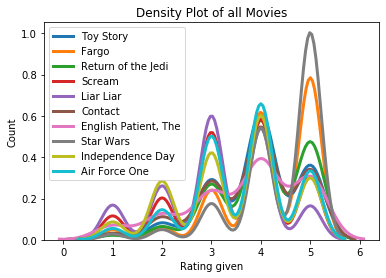

In [16]:
# Step 1: Determine distribution of features

for movie in movies:
    # Subset to the movie
    subset = movies[movie]
    
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = movie)
    
# Plot formatting
# plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot of all Movies')
plt.xlabel('Rating given')
plt.ylabel('Count')

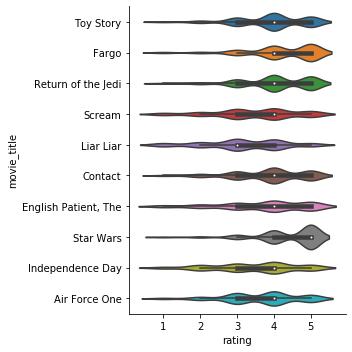

In [29]:
sns.catplot(x="rating", y="movie_title",
            kind="violin", data=data)

(array([ 14.,  37., 128., 167.,  85.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

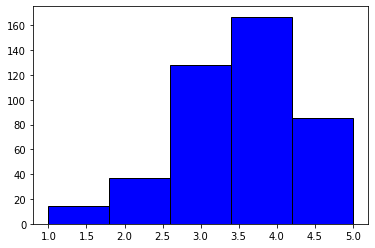

In [25]:
plt.hist(movies['Air Force One'], color = 'blue', edgecolor = 'black',
         bins = 5)

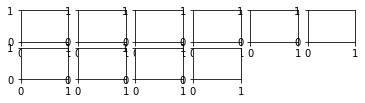

In [24]:

count = 1
for movie in movies: 
    plt.subplot(6,6,count)
    ax.hist(movies[movie], bins = 5,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram of %s' % movie, size = 10)
    ax.set_xlabel('Rating', size = 10)
    ax.set_ylabel('Count', size= 10)
    count += 1

In [ ]:
# Step 2: Find mean and sd of each feature

# create a dictionary with the feature as keys, and the value will be a list: [mean, sd]
feat_mean_sd = {}

for feat in features:
    # create new key
    feat_mean_sd[feat] = []
    # calculate the mean and sd
    feat_values = female[feat]
    feat_mean = feat_values.mean()
    feat_sd = feat_values.var()
    temp = [feat_mean, feat_sd]
    # assign to key
    feat_mean_sd[feat] = temp

In [ ]:
# Step 3: calculate distribution for each feature

from scipy.stats import norm

# create a new dictionary to store all the feature distributions
feat_distrib = {}

for feat in features:
    # create new key
    feat_distrib[feat] = 0
    # calculate the distrib
    distrib = norm(loc = feat_mean_sd[feat][0], scale = feat_mean_sd[feat][1])
    # assign to key
    feat_distrib[feat] = distrib

In [ ]:
# Step 4

num_sim = 1000

In [ ]:
# Step 5
# create a new dictionary to store the simulated results
simulated_feat = {}

for feat in features:
    # create new key
    simulated_feat[feat] = []
    # generate simulations
    sims = feat_distrib[feat].rvs(num_simulation)
    # assign to key
    simulated_feat[feat] = sims

print(simulated_feat)

In [ ]:
# to see plots of each feature's simulation results

count = 1
for feat in features:
    plt.subplot(6,8,count)
    plt.hist(simulated_feat[feat], bins = 50)
    count += 1